In [1]:
# Importing required libraries and dependencies 
import pandas as pd
import datetime as dt 
import numpy as np
from prophet import Prophet 
import matplotlib.pyplot as plt
import hvplot.pandas as hvplot

In [2]:
private_sector_df = pd.read_csv("../Resources/privatesector_Data.csv", delimiter=';').dropna()
economy_df = pd.read_csv("../Resources/Economy_Data.csv", delimiter=';').dropna()
health_poverty_df = pd.read_csv("../Resources/HealthAndpoverty_Data.csv", delimiter=';').dropna()
education_environment_df = pd.read_csv("../Resources/EducationAndEnviron_Data.csv", delimiter=';').dropna()
public_sector_indicators_df = pd.read_csv("../Resources/PublicSector_Indicators.csv", delimiter=';').dropna()

display(private_sector_df.head())
display(economy_df.head())
display(health_poverty_df.head())
display(education_environment_df.head())
display(public_sector_indicators_df.head())


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,1970.0,1.189510e+01
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,1970.0,5.556494e+00
5,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,Brazil,BRA,1970.0,1.851044e+00
7,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,India,IND,1970.0,9.207277e+00
64,Commercial service exports (current US$),TX.VAL.SERV.CD.WT,South Africa,ZAF,1970.0,5.739998e+08


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
5,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,Brazil,BRA,1970.0,3.918974e+11
7,Adjusted net national income (constant 2010 US$),NY.ADJ.NNTY.KD,India,IND,1970.0,1.915335e+11
10,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,Brazil,BRA,1970.0,3.786021e+10
11,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,China,CHN,1970.0,8.525561e+10
12,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,India,IND,1970.0,5.776720e+10


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,1970.0,77.1184
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,1970.0,38.6866
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,1970.0,108.3178
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,1970.0,29.8818
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,1970.0,93.7106


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
24,"Adjusted net enrollment rate, primary (% of pr...",SE.PRM.TENR,South Africa,ZAF,1970.0,67.669150
29,"Adjusted net enrollment rate, primary, female ...",SE.PRM.TENR.FE,South Africa,ZAF,1970.0,68.242070
34,"Adjusted net enrollment rate, primary, male (%...",SE.PRM.TENR.MA,South Africa,ZAF,1970.0,67.096420
55,Agricultural land (% of land area),AG.LND.AGRI.ZS,Brazil,BRA,1970.0,23.378048
56,Agricultural land (% of land area),AG.LND.AGRI.ZS,China,CHN,1970.0,39.900940


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
20,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Brazil,BRA,1970.0,1.641000e+02
22,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,India,IND,1970.0,9.630000e+01
24,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,South Africa,ZAF,1970.0,5.680000e+01
25,"Air transport, passengers carried",IS.AIR.PSGR,Brazil,BRA,1970.0,3.339800e+06
27,"Air transport, passengers carried",IS.AIR.PSGR,India,IND,1970.0,2.671600e+06


In [3]:
year = 2008
private_sector_df = private_sector_df.loc[private_sector_df["Year"] > year].reset_index(drop=True)
economy_df = economy_df.loc[economy_df["Year"] > year].reset_index(drop=True)
health_poverty_df = health_poverty_df.loc[health_poverty_df["Year"] > year].reset_index(drop=True)
education_environment_df = education_environment_df.loc[education_environment_df["Year"] > year].reset_index(drop=True)
public_sector_indicators_df = public_sector_indicators_df.loc[public_sector_indicators_df["Year"] > year].reset_index(drop=True)

display(private_sector_df.head())
display(economy_df.head())
display(health_poverty_df.head())
display(education_environment_df.head())
display(public_sector_indicators_df.head())

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,2009.0,0.448398
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,2009.0,1.164823
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,2009.0,2.301575
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,2009.0,1.922157


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Brazil,BRA,2009.0,5.421578
1,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,China,CHN,2009.0,13.262097
2,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,India,IND,2009.0,9.589941
3,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,Russian Federation,RUS,2009.0,-17.518426
4,Adjusted net national income (annual % growth),NY.ADJ.NNTY.KD.ZG,South Africa,ZAF,2009.0,4.761918


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Brazil,BRA,2009.0,68.3124
1,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,China,CHN,2009.0,7.3248
2,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,India,IND,2009.0,37.9562
3,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,Russian Federation,RUS,2009.0,28.3538
4,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,South Africa,ZAF,2009.0,69.1452


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Brazil,BRA,2009.0,93.27
1,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,China,CHN,2009.0,54.07
2,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,India,IND,2009.0,32.82
3,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,Russian Federation,RUS,2009.0,96.93
4,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,South Africa,ZAF,2009.0,75.04


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Adequacy of social insurance programs (% of to...,per_si_allsi.adq_pop_tot,Brazil,BRA,2009.0,47.538288
1,Adequacy of social protection and labor progra...,per_allsp.adq_pop_tot,Brazil,BRA,2009.0,40.970682
2,Adequacy of social safety net programs (% of t...,per_sa_allsa.adq_pop_tot,Brazil,BRA,2009.0,9.425445
3,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,Brazil,BRA,2009.0,1782.300000
4,"Air transport, freight (million ton-km)",IS.AIR.GOOD.MT.K1,China,CHN,2009.0,11976.438000


In [4]:
master_brics_df = pd.concat([private_sector_df, economy_df, health_poverty_df, education_environment_df, public_sector_indicators_df], axis=0)
display(master_brics_df.head(10))
display(master_brics_df.tail(10))

,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,2009.0,0.448398
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,2009.0,1.164823
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,2009.0,2.301575
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,2009.0,1.922157
5,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,1.155530
6,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,China,CHN,2009.0,3.365280
7,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,India,IND,2009.0,1.635343
8,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,Russian Federation,RUS,2009.0,1.077073
9,Agricultural raw materials imports (% of merch...,TM.VAL.AGRI.ZS.UN,South Africa,ZAF,2009.0,0.872841


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
10302,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,Brazil,BRA,2019.0,63.053001
10303,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,China,CHN,2019.0,55.485001
10304,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,India,IND,2019.0,23.797001
10305,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,Russian Federation,RUS,2019.0,92.210999
10306,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,South Africa,ZAF,2019.0,82.084000
10307,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,Brazil,BRA,2019.0,67.289001
10308,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,China,CHN,2019.0,53.251999
10309,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,India,IND,2019.0,23.715000
10310,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,Russian Federation,RUS,2019.0,93.209999
10311,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,South Africa,ZAF,2019.0,84.447998


In [29]:

#Fetch series names - Exports of Goods & Services & Agricuture Raw Materials Exports from the master dataframe
# Fetch series names - Exports of Goods & Services & Agriculture Raw Materials Exports from the master dataframe
master_brics_Exp_vs_Agr_Exp = master_brics_df.loc[
    master_brics_df['SeriesName'].str.contains('Exports of goods and services \(% of GDP\)|Agricultural raw materials exports ', na=False)
]
master_brics_Exp_vs_Agr_Exp['SeriesName'].unique()
master_brics_Exp_vs_Agr_Exp.head()


,SeriesName,SeriesCode,CountryName,CountryCode,Year,Value
0,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Brazil,BRA,2009.0,3.770854
1,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,China,CHN,2009.0,0.448398
2,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,India,IND,2009.0,1.164823
3,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,Russian Federation,RUS,2009.0,2.301575
4,Agricultural raw materials exports (% of merch...,TX.VAL.AGRI.ZS.UN,South Africa,ZAF,2009.0,1.922157


In [39]:
# Groupby SeriesName and CountryName to get the mean of the values
master_brics_Exp_vs_Agr_Exp_group = master_brics_Exp_vs_Agr_Exp.groupby(['SeriesName', 'CountryName','Year'])["Value"].mean().reset_index()
master_brics_Exp_vs_Agr_Exp_group['Year'] = master_brics_Exp_vs_Agr_Exp_group['Year'].astype(int)
master_brics_Exp_vs_Agr_Exp_group.head(10)

,SeriesName,CountryName,Year,Value
0,Agricultural raw materials exports (% of merch...,Brazil,2009,3.770854
1,Agricultural raw materials exports (% of merch...,Brazil,2010,3.851848
2,Agricultural raw materials exports (% of merch...,Brazil,2011,3.532171
3,Agricultural raw materials exports (% of merch...,Brazil,2012,3.795009
4,Agricultural raw materials exports (% of merch...,Brazil,2013,3.531536
5,Agricultural raw materials exports (% of merch...,Brazil,2014,4.011718
6,Agricultural raw materials exports (% of merch...,Brazil,2015,4.697631
7,Agricultural raw materials exports (% of merch...,Brazil,2016,4.812005
8,Agricultural raw materials exports (% of merch...,Brazil,2017,4.483629
9,Agricultural raw materials exports (% of merch...,Brazil,2018,5.076894


In [40]:
export_correlation = master_brics_Exp_vs_Agr_Exp_group.pivot(index=['CountryName', 'Year'], columns="SeriesName", values="Value").reset_index()



export_correlation.head()

SeriesName,CountryName,Year,Agricultural raw materials exports (% of merchandise exports),Exports of goods and services (% of GDP)
0,Brazil,2009,3.770854,10.851371
1,Brazil,2010,3.851848,10.865585
2,Brazil,2011,3.532171,11.582515
3,Brazil,2012,3.795009,11.877560
4,Brazil,2013,3.531536,11.742231


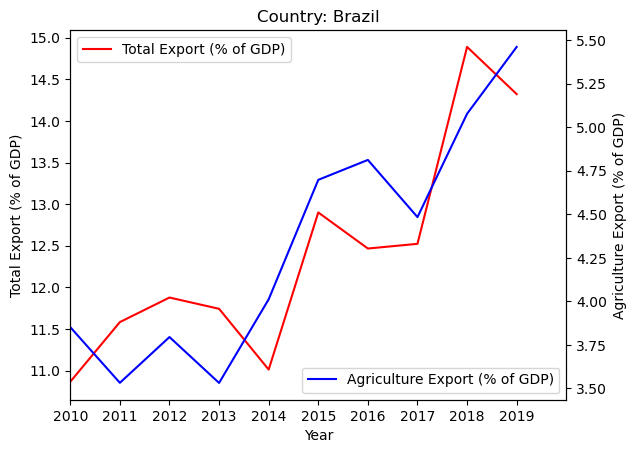

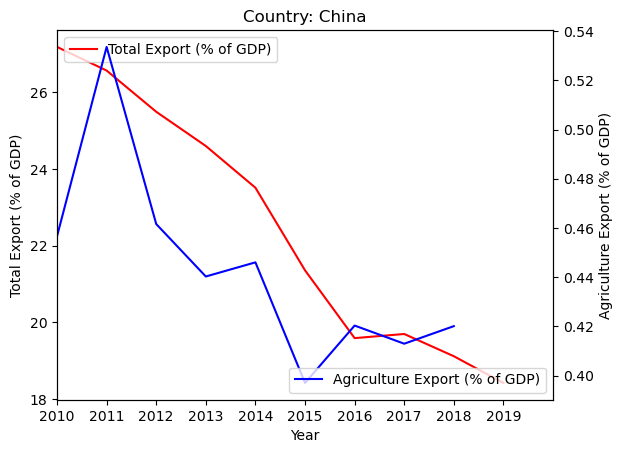

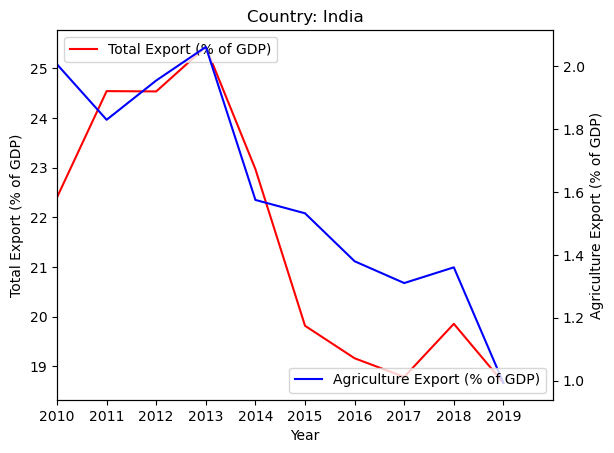

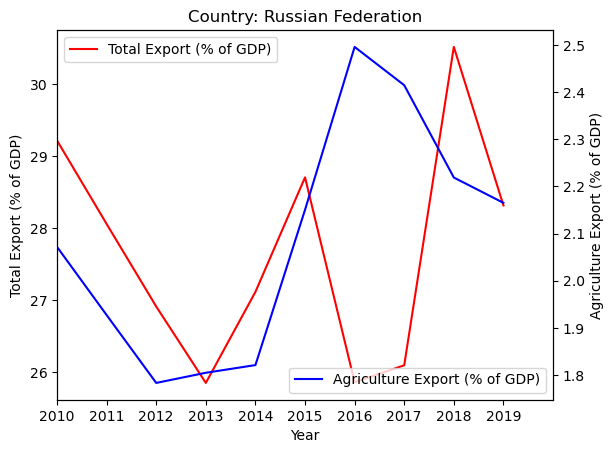

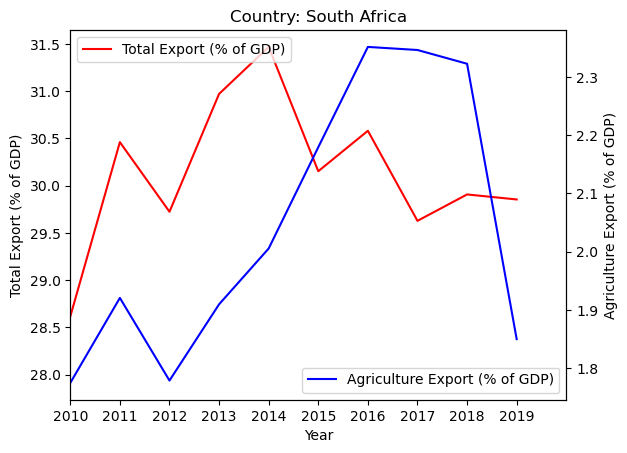

In [44]:
for country in export_correlation['CountryName'].unique():
    country_data = export_correlation.loc[export_correlation['CountryName'] == country]
    
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(country_data['Year'], country_data['Exports of goods and services (% of GDP)'], label='Total Export (% of GDP)', color='r')
    ax2.plot(country_data['Year'], country_data['Agricultural raw materials exports (% of merchandise exports)'], label='Agriculture Export (% of GDP)', color='b')
    
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total Export (% of GDP)')
    ax2.set_ylabel('Agriculture Export (% of GDP)')
    
    plt.xticks(np.arange(2010, 2019 + 1, 1))
    plt.xlim(2010, 2019 + 1)

    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    
    plt.title(f'Country: {country}')
    
    plt.show()